In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


In [7]:
from subprocess import check_output
#print(check_output(["ls","creditcard.csv"]).decode("utf8"))
df = pd.read_csv("creditcard.csv")
df =  shuffle(df).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,60807.0,-0.687764,1.429390,0.939715,0.097022,-0.222333,-1.008467,0.426008,0.305978,-0.690108,...,-0.209117,-0.633628,0.042185,0.349886,-0.105526,0.071702,0.123955,0.037450,8.99,0
1,47515.0,-0.385508,1.037231,1.250634,0.018848,0.150593,-0.522848,0.602304,0.099256,-0.306780,...,-0.242318,-0.625065,0.026116,0.005735,-0.253624,0.103565,0.257540,0.093632,5.25,0
2,68712.0,1.201228,0.200174,0.617933,0.554089,-0.525636,-0.785506,-0.037396,-0.070227,-0.224462,...,-0.192087,-0.597111,0.148845,0.529622,0.158784,0.064465,-0.032962,0.011009,2.69,0
3,49805.0,0.631505,-1.560116,0.605894,-1.076612,-1.721784,-0.613007,-0.394022,0.021940,1.697778,...,0.356295,0.552375,-0.352460,0.626825,0.303412,0.053099,-0.017853,0.066928,305.26,0
4,47048.0,-0.579234,-0.632819,2.673673,-2.223064,-1.679491,-0.257446,-0.664227,0.158521,-1.598556,...,-0.185679,-0.155120,-0.148656,0.342002,0.246235,-0.277184,0.078812,0.073218,40.00,0


In [8]:
frac =0.80 
X_train = df.sample(frac=frac)
count_FRAUDE = len(X_train)

#X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)].reset_index(drop=True).astype(float)

#Add our target features to y_train and y_test.
y_train = pd.DataFrame({'Class':X_train.Class.reset_index(drop=True)})



y_test = pd.DataFrame({'Class':X_test.Class.reset_index(drop=True)})

#Drop target features from predictors X_train and X_test.
X_train = X_train.drop(['Class'], axis = 1).reset_index(drop=True)
X_test = X_test.drop(['Class'], axis = 1).reset_index(drop=True)


In [9]:
features = X_train.columns.values
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

In [13]:
nrow = len(X_train)
depthList = np.array(range(1,20)) #search depth list
xvalMSE =[]
epoch = 1
score_history =[]
for iDepth in depthList:

    for ixval in range(epoch):

        xTrain = X_train.as_matrix()
        yTrain = y_train.as_matrix().ravel()
        xTest = X_test.as_matrix()
        yTest = y_test.as_matrix().ravel()

    
        treeModel = DecisionTreeClassifier(max_depth = iDepth)
        treeModel.fit(xTrain, yTrain)
        
        treePrediction = treeModel.predict(xTest)
        treePrediction=np.array(treePrediction,dtype=np.float32)
        yTest = np.array(yTest,dtype=np.float32)
        
        error = [yTest[r] - treePrediction[r] for r in range(len(yTest))]

        
        if ixval == 0:
            oosErrors = sum([e*e for e in error])
        else:
            oosErrors += sum([e*e for e in error])
    score = roc_auc_score(yTest, treePrediction)
    score_history.append(score)    
    mse = oosErrors/nrow
    xvalMSE.append(mse)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load

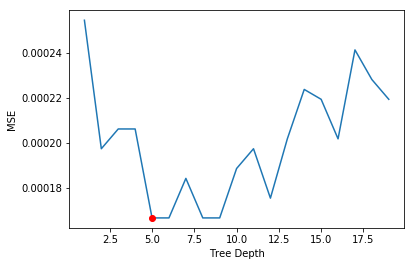

In [14]:
plt.figure()
plt.plot(depthList,xvalMSE)
plt.axis("tight")
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
opt_depth = depthList[np.argmin(xvalMSE)]
plt.plot(opt_depth,np.amin(xvalMSE),"or")

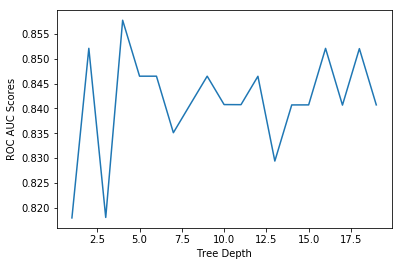

In [15]:
plt.figure()
plt.plot(depthList,score_history)
plt.axis("tight")
plt.xlabel("Tree Depth")
plt.ylabel("ROC AUC Scores")
plt.show()

In [16]:
print("Minimum MSE:",np.amin(xvalMSE))
print("Maximum ROC AUC Score:", np.amax(score_history))

Minimum MSE: 0.00016677931585369065
Maximum ROC AUC Score: 0.8577611320597887


In [17]:
class_names= {0:'Not Fraud',1:'Fraud'}
print(df.Class.value_counts().rename(index=class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64
